# <span style="font-family: 'Brush Script MT', cursive;font-size: 56px;color: hotpink ;">FROM SCRIPT TO STATS </span>  - THE FILM INDUSTRY ANALYSIS

# 1. BUSINESS UNDERSTANDING
Everyone loves a story and movies tell them best.The movie industry whether hollywood,nollywood or even bollywood is a very intresting industry.Alot goes into making a film : production ,casting ,distribution and many other major sectors.For the longest time the industry has been viewed as a **high risk, high reward venture**.This is because of the unpredictable box office performance to shifting audience prefrences among other factors.For example movie budgets can go up to billions of dollars and not a guaranteed return on profits.

However, the rise of international markets streaming platforms and production strategies,the industry offers new ideas to mitigate and capitalize on high yield opportunities.**We can conclude that when movies are well excuted movies/films generally yeild high returns.**

In this analysis we shall be comparing budgets to profits,analyze genre performance in the box office and analyze trends over time to help us derive useful insights over the years.All this to answer questions and have useful information to prepare us before we venture into this industry. 

<img src="blackpanther.webp" width="900" height="300" style="image-rendering: auto;">


# 2. OBJECTIVES

**2.1 Main objectives**
1. To investigate and analyze films that are doing well in the box office in the last decade.

**2.2 specific objectives**
1. To identify the most popular genres that are highly rated.
2. To provide insights on investment opportunities in the film industry.
3. To help stakeholders to plan and be aware of competition( studios' that are doing well)
4. To check the relationship between production budget and worldwide gross.
5. To look at the trends in domestic vs foreign gross over the years.
6. To compare the effects of ratings on movies.

**2.3 Metric of success**

To correctly identify the current box office highly grossing films over the last decade on merits such as genre, rating and worldwide_grossing.

# 3.EXPERIMENTAL DESIGN
Below is the expected workflow:

 * Loading our libraries and dataset
 * Data Cleaning and preparation
 * Dealing with missing values
 * Dealing with duplicates
 * merging datasets
 * using a database

* Performing EDA
   * Univariate Analysis
   * Bivariate Analysis
   * Multivariate Analysis


* Conclusion

* Recommendations




# 4. DATA UNDERSTANDING
There are 5 datasets and 1 dataframe namely:`bom_movie.gross.csv`, `tn.movie_budgets.csv` , `rt.movie_info.tsv` , `rt.reviwes.tsv`,`tmb.movies.csv` and `IMDB` database.They were derived from the following websites.
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

**4.1  <u>DATASET 1</u> , the dataset `rt.movie_info.tsv` and `rt.reviwes.tsv`are inner joined to form the datset `mergedinfo_reviews` with 54,432 rows and 7 columns.Our focus will be on the following columns.**

* `id`  a unique indentifier         
* `rating` age based classification         
* `genre`  style or movie describtion      
* `runtime` the time a movie takes     
* `fresh`  fresh/rotten review given to a movie by audience   


**4.2  <u>DATASET 2</u> , the dataset`bom_movie.gross.csv`and `tn.movie_budgets.csv` are left joined to form the dataset `mergedbom_budgets.csv` with 5,782 rows and 8 columns.We will be working with the following columns.**
* `id` a unique identifier of the dataset
* `release_date` the date various movies where released
* `production_budget` the money allocated to making various movies
* `domestic_gross_x` total box office returns of various movies within it's country
* `worldwide_gross` total box office returns of various movies globally
* `studio`           film production and distribution company
* `foreign_gross_estimate`total box office returns of various movies internationally
* `gross_profit` the amount of money a movie makes after subtracting the budget


**4.3  <u>IMDB DATABASE</u> , we used 2 tables from this database namely `movie_basics` and `movie_ratings` and inner join on the column `movie_id` which i cleaned and saved as `IMDB.CSV` database with 73,856 rows and 5 columns** namely:
* `movie_id`       unique identifier (primary key)
* `primary_title`  title of the movie    
* `genres`          style or movie description
* `averagerating`    the score a movie recieves out of 10 on how good it is
* `numvotes`       total votes a movie got


# For the Tableau presentation click this [link](https://public.tableau.com/app/profile/daisy.thomas8647/viz/Book1_17542800680300/Dashboard4)

# For the Non-Technical presentation refer to this [link](presentation.pdf)

# 5. DATA PREPARATION

# 5.1 Data exploration

### 5.1.1 LOADING LIBRARIES

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's load the dataset and prepare the dataset that will be used in this analysis.In order to do this we have to look at each dataset individually before any other step then we will continue to clean the dataset before merging them.

### 5.1.2 LOADING A DATASET

# * `bom_movie.gross.csv`

In [2]:
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# 5.2 DATA CLEANING

Let's check for missing values in ` bom.movie_gross.csv ` and deal with them.

In [5]:
bom_movie.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The dataset has 5 missing values on `studio` and 28 missing values on `domestic_gross` and finally 1350 missing values on `foreign_gross` for us to work with this dataset we need to clean and fill for those values where necessary.

In [6]:
bom_movie['studio'].value_counts().head()

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
Name: count, dtype: int64

Let's delete the 5 missing values for the `studio` column and make sure the column has all the records in uppercase and get rid of all whitespaces to bring consistency to the column.

In [7]:
# Convert to uppercase and remove all whitespace (including spaces, tabs)
bom_movie['studio'] = bom_movie['studio'].str.upper().str.replace(r'\s+', '', regex=True)


In [8]:
#delete null values
bom_movie = bom_movie.dropna(subset=['studio'])


The column  `foreign_gross` has a Dtype of object let's convert that to a float because it's numeric inputs and convert Invalid values to NAN.

In [9]:
# convert datatype to float
bom_movie['foreign_gross'] = pd.to_numeric(bom_movie['foreign_gross'], errors='coerce')


In [10]:
# Numeric columns
numeric_cols = bom_movie.select_dtypes(include=['number']).columns

# Categorical columns
categorical_cols = bom_movie.select_dtypes(include=['object', 'category']).columns

print(f"This are the numeric columns {numeric_cols}")
print(f"This are the the categorical columns {categorical_cols}")


This are the numeric columns Index(['domestic_gross', 'foreign_gross', 'year'], dtype='object')
This are the the categorical columns Index(['title', 'studio'], dtype='object')


In [11]:
pd.set_option('display.float_format', '{:.2f}'.format) # to convert output to real numbers
print(bom_movie.describe())

       domestic_gross  foreign_gross    year
count         3356.00        2028.00 3382.00
mean      28771489.56    75139698.51 2013.96
std       67006943.10   137633505.41    2.48
min            100.00         600.00 2010.00
25%         120000.00     3800000.00 2012.00
50%        1400000.00    19000000.00 2014.00
75%       27950000.00    75050000.00 2016.00
max      936700000.00   960500000.00 2018.00


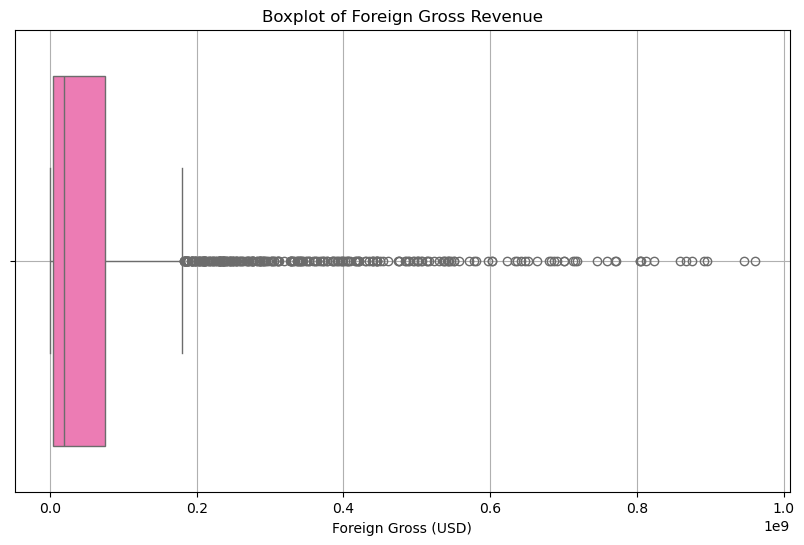

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=bom_movie['foreign_gross'], color='hotpink')
plt.title('Boxplot of Foreign Gross Revenue')
plt.xlabel('Foreign Gross (USD)')
plt.grid(True)
plt.show()

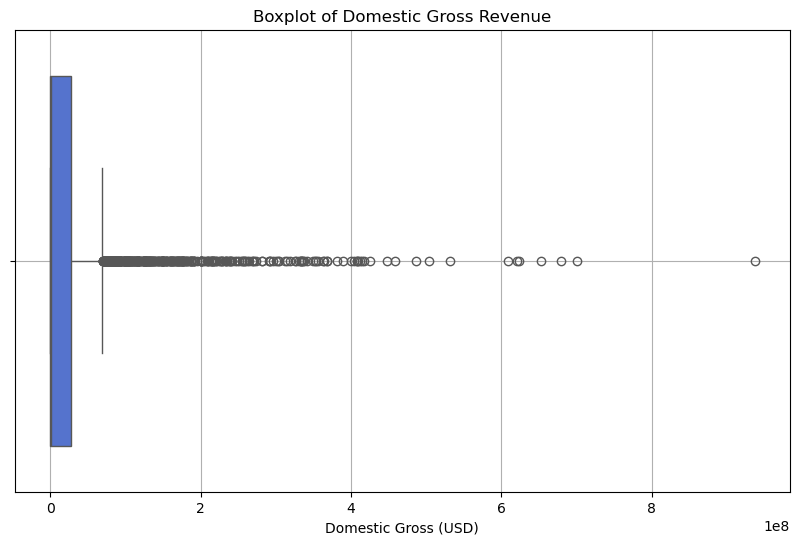

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=bom_movie['domestic_gross'], color='royalblue')
plt.title('Boxplot of Domestic Gross Revenue')
plt.xlabel('Domestic Gross (USD)')
plt.grid(True)
plt.show()

We will use median to fill for the missing values in the `foriegn_gross`and `domestic_gross`.This is because in the `foriegn_gross` column which as you can see from the above **boxplot** has a very big range of outliers.

Since the `domestic_gross` has a minumum value of 100 and maximum value of 936,700,000. We can't use the mean of 28,745,845 because mean it is highly senstive to extreme values which won't be the advisable to fill of the missing values.
We therefore choose to use the median to fill for the missing values.

In [14]:
#fill for null values with median
bom_movie['domestic_gross'] = bom_movie['domestic_gross'].fillna(bom_movie['domestic_gross'].median())

In [15]:
bom_movie['foreign_gross'] = bom_movie['foreign_gross'].fillna(bom_movie['foreign_gross'].median())

In [16]:
#check if we have remaining null values
bom_movie.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [17]:
bom_movie.shape

(3382, 5)

Save the cleaned dataframe so we can use it later own in our analysis.

In [18]:
bom_movie.to_csv('cleanedbom_movie.csv', index=False)

## NB
**We will apply the same procedure to the remaining datasets.**

# * `tn.movie_budgets.csv` 

In [19]:
movie_budget = pd.read_csv("tn.movie_budgets.csv")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [21]:
movie_budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

This dataset does not contain any missing values,so let's check for duplicates and convert to appropriate data types.

In [22]:
movie_budget.duplicated().sum()

0

`production_budget`,`domestic_gross` and `worldwide_gross` are numeric values but have a datatype object let's convert it to float so we can easily work with it.


In [23]:
#list of columns that need cleaning
cols_to_convert = ['production_budget','domestic_gross','worldwide_gross']
# get rid of the $ and , and change data type to float
for col in cols_to_convert:
    movie_budget[col] = movie_budget[col].replace(r'[\$,]', '', regex=True).astype(float)

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
movie_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.00,5782.00,5782.00,5782.00
mean,50.37,31587757.10,41873326.87,91487460.91
std,28.82,41812076.83,68240597.36,174719968.78
min,1.00,1100.00,0.00,0.00
25%,25.00,5000000.00,1429534.50,4125414.75
50%,50.00,17000000.00,17225945.00,27984448.50
75%,75.00,40000000.00,52348661.50,97645836.50
max,100.00,425000000.00,936662225.00,2776345279.00


In [25]:
movie_budget.shape

(5782, 6)

In [26]:
movie_budget.to_csv('cleanedmovie_budget.csv', index=False)

# * `rt.movie_info.tsv`

In [27]:
movie_info = pd.read_csv("rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


This dataset has a number of columns that we won't be used in our analysis so it's safe to drop those columns we consider 'irrelevant'.

In [28]:
movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [29]:
movie_info = movie_info.drop(['synopsis', 'director','writer','theater_date','dvd_date','currency', 'box_office'], axis=1)


In [30]:
movie_info.isnull().sum()

id            0
rating        3
genre         8
runtime      30
studio     1066
dtype: int64

Let's fill for missing values.

In [31]:
# fill missing values of rating with NR
movie_info['rating'] = movie_info['rating'].fillna('NR')

In [32]:
movie_info['genre'] = movie_info['genre'].fillna('UNKOWN')

In [33]:
 # extract numeric part.astype(float)               # convert to float (allows NaN)
movie_info['runtime'] = (movie_info['runtime'].str.extract(r'(\d+)').astype(float))      

In [34]:
#get the mode of runtime
movie_info['runtime'].mode()

0   90.00
Name: runtime, dtype: float64

In [35]:
movie_info['runtime'] = movie_info['runtime'].fillna('90.0')

we'll have to drop the studio because it's missing almost 90% of the data

In [36]:
movie_info.drop('studio',axis=1, inplace=True)

In [37]:
movie_info.isnull().sum()

id         0
rating     0
genre      0
runtime    0
dtype: int64

In [38]:
movie_info.shape

(1560, 4)

In [39]:
movie_info.tail()

,id,rating,genre,runtime
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106.00
1556,1997,PG,Comedy|Science Fiction and Fantasy,88.00
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111.00
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101.00
1559,2000,R,Action and Adventure|Art House and Internation...,94.00


In [40]:
movie_info.to_csv('cleanedmovie_info.csv', index=False)

# *`rt.reviwes.tsv`

In [41]:
movie_reviews =pd.read_csv("rt.reviews.tsv",sep ='\t',encoding ="Latin1")
movie_reviews.tail(7)

,id,review,rating,fresh,critic,top_critic,publisher,date
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [42]:
movie_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [43]:
movie_reviews.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [44]:
#drop listed columns
movie_reviews = movie_reviews.drop(['review','rating', 'critic','publisher'], axis=1)

In [45]:
movie_reviews.shape

(54432, 4)

In [46]:
movie_reviews.to_csv('cleanedmovie_reviews.csv', index=False)

# 5.3 MERGING DATASETS

In the merging of datasets we will also do the following processes.
* Data cleaning
* Feature engineering

# 5.3.1 Merging dataset 1

Let's begin by merging the `cleanedmovie_info.csv` with the `cleanedmovie_reviews` **with a inner join** on the column `id`.

In [47]:
movie_info = pd.read_csv('cleanedmovie_info.csv')
movie_reviews= pd.read_csv('cleanedmovie_reviews.csv')
info_reviews = pd.merge(movie_info, movie_reviews, on='id', how='inner')


In [48]:
info_reviews.head()

,id,rating,genre,runtime,fresh,top_critic,date
0,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"November 10, 2018"
1,3,R,Drama|Science Fiction and Fantasy,108.00,rotten,0,"May 23, 2018"
2,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"January 4, 2018"
3,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"November 16, 2017"
4,3,R,Drama|Science Fiction and Fantasy,108.00,fresh,0,"October 12, 2017"


In [49]:
info_reviews.shape

(54432, 7)

### Data cleaning
After merging the datasets even though we did cleaning initially it's also advisable to clean the new dataset.

In [50]:
info_reviews.isnull().sum()


id            0
rating        0
genre         0
runtime       0
fresh         0
top_critic    0
date          0
dtype: int64

let's clean the column `genre` by removing the , and | separeting the records in that column.

In [51]:
info_reviews['genre'] = info_reviews['genre'].str.replace(r'[|]', ',', regex=True)
info_reviews['genre'] = info_reviews['genre'].str.split(',')
info_reviews= info_reviews.explode('genre')
#Strip spaces
info_reviews['genre'] = info_reviews['genre'].str.strip()


## Feature engineering

let's change the column date to datetime so that it's easy to work with.

In [52]:
info_reviews['date'] = pd.to_datetime(info_reviews['date'], errors='coerce')

In [53]:
info_reviews.head()

,id,rating,genre,runtime,fresh,top_critic,date
0,3,R,Drama,108.00,fresh,0,2018-11-10
0,3,R,Science Fiction and Fantasy,108.00,fresh,0,2018-11-10
1,3,R,Drama,108.00,rotten,0,2018-05-23
1,3,R,Science Fiction and Fantasy,108.00,rotten,0,2018-05-23
2,3,R,Drama,108.00,fresh,0,2018-01-04


After cleaning our merged dataframes,let's save the final product.

In [54]:
info_reviews.to_csv('mergedinfo_reviews.csv', index=False)

##  5.3.2 Merging dataset 2

Now, let's do a **left join** to merge `cleanedmovie_budget.csv` with the `cleanedbom_movie.csv` on `movie` and right on `title`.

In [55]:
movie_budget = pd.read_csv('cleanedmovie_budget.csv')
bom_movie = pd.read_csv('cleanedbom_movie.csv')

merged_df = pd.merge(movie_budget, bom_movie, left_on='movie', right_on='title', how='left')
merged_df.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,Pirates of the Caribbean: On Stranger Tides,BV,241100000.00,804600000.00,2011.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,Avengers: Infinity War,BV,678800000.00,19000000.00,2018.00
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.00,309420425.00,963420425.00,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,300000000.00,229024295.00,655945209.00,Justice League,WB,229000000.00,428900000.00,2017.00
9,10,"Nov 6, 2015",Spectre,300000000.00,200074175.00,879620923.00,Spectre,SONY,200100000.00,680600000.00,2015.00


In [56]:
merged_df.shape

(5782, 11)

In [57]:
merged_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title', 'studio', 'domestic_gross_y',
       'foreign_gross', 'year'],
      dtype='object')

In [58]:
merged_df.isnull().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross_x        0
worldwide_gross         0
title                4536
studio               4536
domestic_gross_y     4536
foreign_gross        4536
year                 4536
dtype: int64

Since they are columns existing twice like the `domestic_gross`, let's drop the one with missing values.The column `release_date` and `year` have the same contents so it only makes sense we get rid of `year` because of the missing values it has.

In [59]:
merged_df = merged_df.drop(['title', 'domestic_gross_y', 'year'], axis=1)


In [60]:
merged_df['studio'] = merged_df['studio'].fillna('UNK')


## Feature engineering

In [61]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'], errors='coerce')


In [62]:
merged_df.describe()

,id,release_date,production_budget,domestic_gross_x,worldwide_gross,foreign_gross
count,5782.00,5782,5782.00,5782.00,5782.00,1246.00
mean,50.37,2004-07-06 05:20:31.546177792,31587757.10,41873326.87,91487460.91,90172681.53
min,1.00,1915-02-08 00:00:00,1100.00,0.00,0.00,600.00
25%,25.00,2000-04-22 18:00:00,5000000.00,1429534.50,4125414.75,13525000.00
50%,50.00,2007-03-02 00:00:00,17000000.00,17225945.00,27984448.50,26050000.00
75%,75.00,2012-12-25 00:00:00,40000000.00,52348661.50,97645836.50,94375000.00
max,100.00,2020-12-31 00:00:00,425000000.00,936662225.00,2776345279.00,946400000.00
std,28.82,NaN,41812076.83,68240597.36,174719968.78,146195058.98


In [63]:
merged_df['foreign_gross_estimate'] =merged_df['worldwide_gross'] - merged_df['domestic_gross_x']

In [64]:
merged_df.head(11)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,foreign_gross_estimate
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,UNK,NaN,2015837654.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,804600000.00,804600000.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,UNK,NaN,107000000.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,946400000.00,944008095.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,UNK,NaN,696540365.00
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,UNK,NaN,1116648995.00
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,BV,19000000.00,1369318718.00
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.00,309420425.00,963420425.00,UNK,NaN,654000000.00
8,9,2017-11-17,Justice League,300000000.00,229024295.00,655945209.00,WB,428900000.00,426920914.00
9,10,2015-11-06,Spectre,300000000.00,200074175.00,879620923.00,SONY,680600000.00,679546748.00


we can generate `foreign_gross` by subtrating the `worldwide_gross` and the `domestic_gross_x` columns. If you compare the new column `foreign_gross_estimate` gives as values almost similar to `foreign_gross`. instead of taking the `foriegn_gross` whose values are rounded of and missing we can opt to use`foriegn_gross_estimate`.

In [65]:
merged_df = merged_df.drop([ 'foreign_gross'], axis=1)

In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      5782 non-null   int64         
 1   release_date            5782 non-null   datetime64[ns]
 2   movie                   5782 non-null   object        
 3   production_budget       5782 non-null   float64       
 4   domestic_gross_x        5782 non-null   float64       
 5   worldwide_gross         5782 non-null   float64       
 6   studio                  5782 non-null   object        
 7   foreign_gross_estimate  5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 361.5+ KB


In [67]:
merged_df['gross_profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']

In [68]:
merged_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'foreign_gross_estimate', 'gross_profit'],
      dtype='object')

In [69]:
merged_df.to_csv('mergedbom_budgets.csv', index=False)

# 5.4 USING THE `IMDB` DATABASE.

we will use the **IMDB** database `im.db.zip` but we will only focuse on two tables `movie_basics` and `movie_ratings` tables.

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)


import the necessary libraries required to deal with a database `imdb` and unzip the file.

In [70]:
import sqlite3
import zipfile
import os
zipfile.ZipFile("im.db.zip", 'r').extractall("temp_folder")
conn = sqlite3.connect("temp_folder/im.db")

In [71]:
df = pd.read_sql("""SELECT name 
                    FROM sqlite_master
                    WHERE type ='table';""",conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Let's get to see the contents of the `movie_basics` table.

In [72]:
df = pd.read_sql(""" SELECT *
                     FROM  movie_basics
                     LIMIT 10;""",conn)
df                   

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.00,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.00,Biography


The table has 6 columns and if you pay close attention to the `runtime` column contains null values.Also, the `primary_title` and `original_title` have similar records that differ only slightly.

In [73]:
df = pd.read_sql(""" SELECT *
                     FROM movie_ratings
                     LIMIT 5;""",conn)
df                   

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


The table `movie_ratings` has only 3 columns and has a similar table to `movie_basics`.Let's join our tables with a common column known as `movie_id` and arrange from the first `movie_id`.

In [74]:
df = pd.read_sql("""SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title,
    movie_basics.genres,
    movie_ratings.numvotes,
    movie_ratings.averagerating
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY movie_ratings.movie_id ASC
LIMIT 10;""",conn)
df


,movie_id,primary_title,genres,numvotes,averagerating
0,tt0063540,Sunghursh,"Action,Crime,Drama",77,7.00
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",43,7.20
2,tt0069049,The Other Side of the Wind,Drama,4517,6.90
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",13,6.10
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",119,6.50
5,tt0112502,Bigfoot,"Horror,Thriller",32,4.10
6,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",263,8.10
7,tt0146592,Pál Adrienn,Drama,451,6.80
8,tt0154039,So Much for Justice!,History,64,4.60
9,tt0159369,Cooper and Hemingway: The True Gen,Documentary,53,7.60


Let's get to know the most popular genre.

In [75]:
df = pd.read_sql("""SELECT  mb.genres,
    AVG(mr.averagerating) AS avg_rating,
    COUNT(genres) AS movie_count
FROM movie_basics AS mb
JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
GROUP BY mb.genres
ORDER BY movie_count DESC
LIMIT 5;""",conn)
df

,genres,avg_rating,movie_count
0,Drama,6.49,11612
1,Documentary,7.29,10313
2,Comedy,5.78,5613
3,Horror,4.84,2692
4,"Comedy,Drama",6.36,2617


Inorder to conduct even more analysis on this two tables, let's choose the relavant tables for our analysis then change and save them as a csv file.

In [76]:
query = ("""SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title,
    movie_basics.genres,
    movie_ratings.averagerating,
    movie_ratings.numvotes
FROM movie_basics
JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
ORDER BY movie_basics.movie_id ASC;""")



In [77]:
df = pd.read_sql_query(query, conn)


In [78]:
df.to_csv("merged_imdb.csv", index=False)

In [79]:
#close connection
conn.close()

convert it to a csv file inorder to clean and get rid of the missing values because we can't do that with SQL language and it's easier to use pandas.

## 5.4.1 CLEAN THE CONVERTED DATABASE

In [80]:
merged_imdb = pd.read_csv('merged_imdb.csv')
df.head()

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.50,119


In [81]:
merged_imdb.shape

(73856, 5)

In [82]:
merged_imdb.isnull().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

Only one column has missing values, let's fill for those values.

Since `genres` has 804 missing values, fill for them with UNK standing for unknown values.

In [83]:
merged_imdb['genres'] = merged_imdb['genres'].fillna('UNK')

let's get rid of the , and | separtors.

In [84]:
# Split, explode, and clean genres
merged_imdb['genres'] = merged_imdb['genres'].str.split(',')
merged_imdb= merged_imdb.explode('genres')
merged_imdb['genres'] = merged_imdb['genres'].str.strip()


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [86]:
merged_imdb.to_csv("IMDB.csv", index=False)


In [87]:
df = pd.read_csv('IMDB.csv')
df.head()

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Action,7.00,77
1,tt0063540,Sunghursh,Crime,7.00,77
2,tt0063540,Sunghursh,Drama,7.00,77
3,tt0066787,One Day Before the Rainy Season,Biography,7.20,43
4,tt0066787,One Day Before the Rainy Season,Drama,7.20,43


# 6. EXPLANATORY DATA ANALYSIS

## 6.1 UNIVARIATE ANALYSIS

### 6.1.1  <U>TOP APPEARING MOVIE GENRES.</U>

From the `merged_imdb.csv` ,let's get to see the most popular genres.

In [88]:
merged_imdb.columns

Index(['movie_id', 'primary_title', 'genres', 'averagerating', 'numvotes'], dtype='object')

In [89]:
genre_counts = merged_imdb['genres'].value_counts().sort_values(ascending=False).nlargest(10)
genre_counts.head()

genres
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Name: count, dtype: int64

In [90]:
genres_percentage = merged_imdb['genres'].value_counts(normalize=True) * 100
genres_percentage= genres_percentage.round(2)
genres_percentage.head()

genres
Drama         23.81
Documentary   13.73
Comedy        13.37
Thriller       6.36
Horror         5.94
Name: proportion, dtype: float64

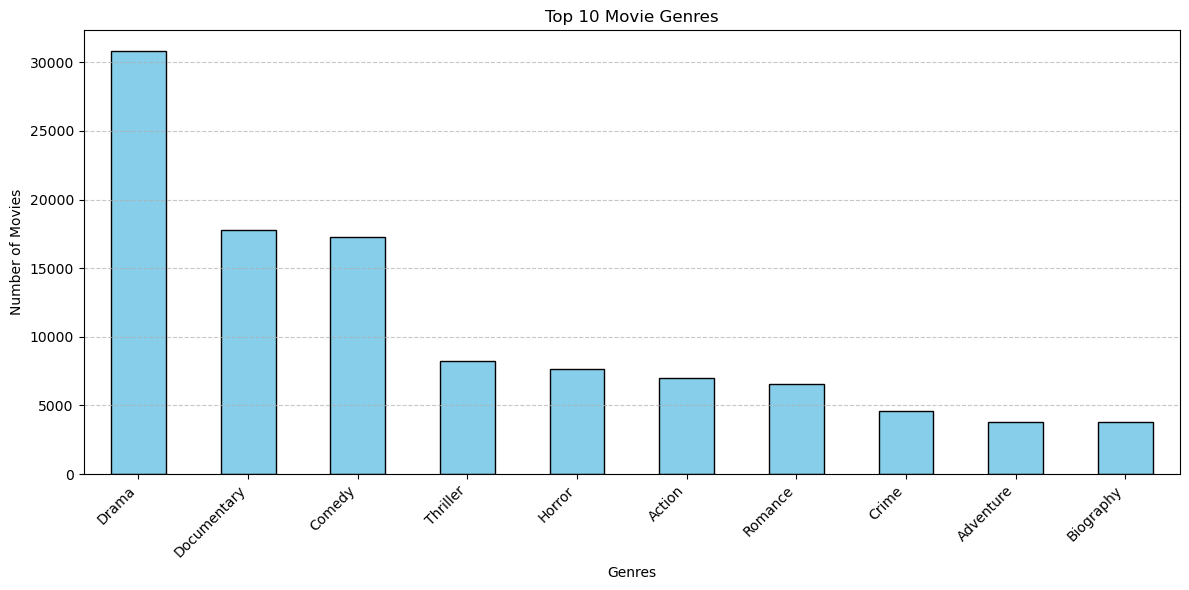

In [91]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Top 10 genres.png', dpi=300, bbox_inches='tight')


plt.show()

As you can see from the above visualization, **Drama** is the leading genre covering 23.81% of our data followed by **Documentary**, **Comedy**, **Thriller** and **Horror** having 13.73% , 13.37% , 6.36% and 5.94% respecively. 

## 6.1.2   <u>DISTRIBUTION OF MOVIE RATINGS</U>

In [92]:
info = pd.read_csv("mergedinfo_reviews.csv")
info.head(3)

,id,rating,genre,runtime,fresh,top_critic,date
0,3,R,Drama,108.00,fresh,0,2018-11-10
1,3,R,Science Fiction and Fantasy,108.00,fresh,0,2018-11-10
2,3,R,Drama,108.00,rotten,0,2018-05-23


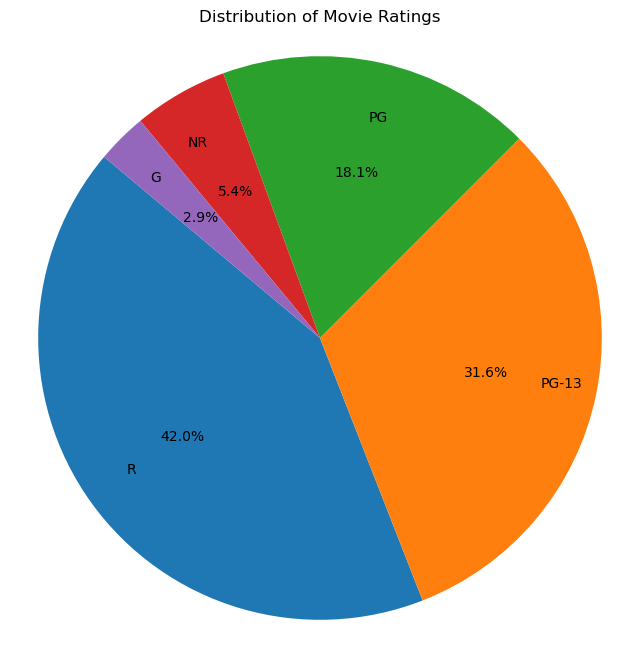

In [93]:
rating_counts = info['rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',labeldistance=0.8, startangle=140)
plt.title('Distribution of Movie Ratings')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

* **R** stands for (Restricted) which is consitutes 42.0%
This movies are restricted to viewers of a certain age (17 and above)
* **PG-13** (parents strongly cautioned) which is 31.6%
Some material may be inappropriate for children under 13
* **PG** (parental guidance) consitutes 18.1%
Some material may not be suitable for children.
* **NR** (not rated) - 5.4%
These films haven't been submitted for an official rating by the MPAA.
* **G** (General audience) - 2.9%
Suitable for all ages.

What we can deduce is that the studio produce more R-rated and PG-13 films so they can capture a large adult and teen audience.Their is very limited investment in G-rated films as it only covers 2.9% of the movies.An investment in PG-13 films will give us a broad audience,while investing in R-rated films gives us a creative flexiblity because of the targeted age group and a niche appeal to the consumers.


## 6.2 BIVARIATE ANALYSIS

## 6.2.1 <U>STUDIOS' WITH HIGHEST PRODUCTION BUDGET</U>

We'll be trying to analyze the studio's with the highest production budget and highest grossing both domestic and foriegn gross.Inorder to do this we will use the `mergedbom_budgets.csv`

In [94]:
budget = pd.read_csv('mergedbom_budgets.csv')

In [95]:
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'foreign_gross_estimate', 'gross_profit'],
      dtype='object')

In [96]:
budget.isnull().sum()

id                        0
release_date              0
movie                     0
production_budget         0
domestic_gross_x          0
worldwide_gross           0
studio                    0
foreign_gross_estimate    0
gross_profit              0
dtype: int64

In [97]:
studio_budget = budget.groupby('studio')['production_budget'].sum().sort_values(ascending=False)
studio_budget.head()

studio
UNK    124046756509.00
BV       9450800000.00
WB       8197700000.00
FOX      7755500000.00
UNI.     6597700000.00
Name: production_budget, dtype: float64

In [98]:
# Calculate total budget
total_budget = studio_budget.sum()
# Convert to percentage
production_budget_pct = (studio_budget / total_budget * 100).round(2)
# Show top 5 with percentage
print(production_budget_pct.head())


studio
UNK    67.92
BV      5.17
WB      4.49
FOX     4.25
UNI.    3.61
Name: production_budget, dtype: float64


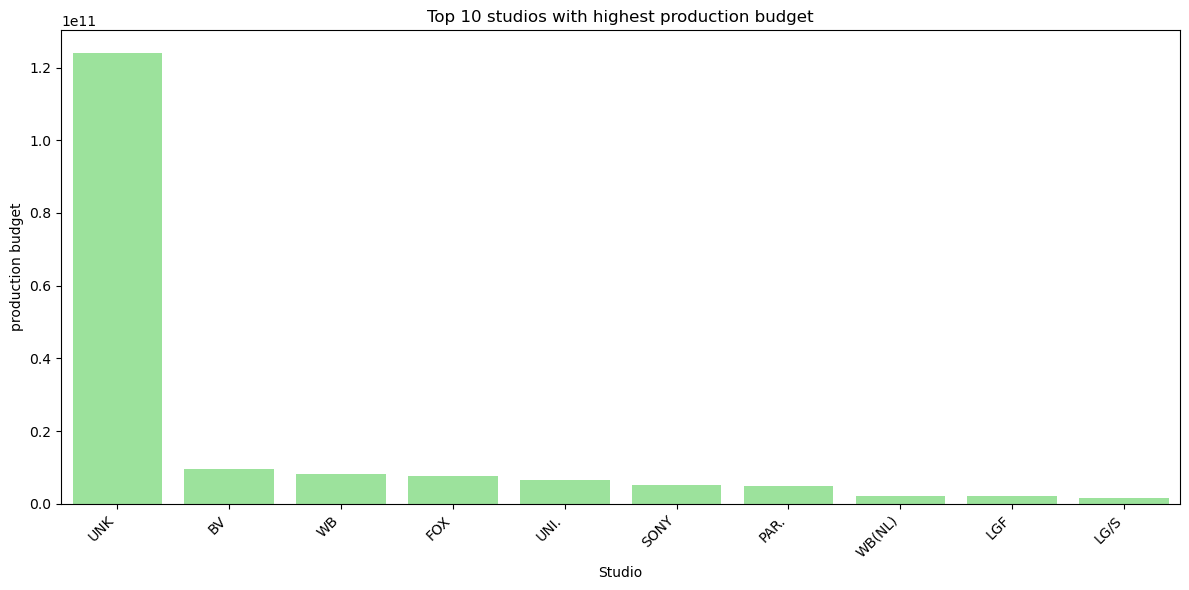

In [99]:
top_studios = studio_budget.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios.index, y=top_studios.values, color='lightgreen')

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 studios with highest production budget')
plt.xlabel('Studio')
plt.ylabel('production budget')
plt.tight_layout()
plt.show()


## **TOP 5 STUDIOS**

* UNK-this means the data is unspecified.
* BV(Buena Vista) is  a distribution label for Walt Disney Studios Motion Pictures.
* UNI. is a shorthand for Universal Pictures.
* FOX refers to 20th Century Fox, which was acquired by Disney in 2019.
* WB is short for Warner Bros.

Ignoring the UNKNOWN studio,Let's focuse on the other top 5 studios.Therefore the Studio with the highest budget is **BUENA VISTA(BV)** which has allocates a budget of **9,450,800,000**  to it's movie production.
This is followed closely with **WARNER BROS** studio with **8,197,700,000** then the **20th CENTURY FOX** with a budget of **7,755,500,000** and then **UNIVERSAL PICTURES** with a budget of **6,597,700,000**.

This doesn't give us a correct analysis of the studio with the highest budget because**124,046,756,509** is unaccounted for in the `UNKNOWN` column and this consitutes **67.2%** of the data.But it will help us analyze if a higher production budget translates to gross and  a higher return on profit.


## 6.2.2 <U>RELATIONSHIP BETWEEN PRODUCTION BUDGET AND WORLDWIDE GROSS</U>

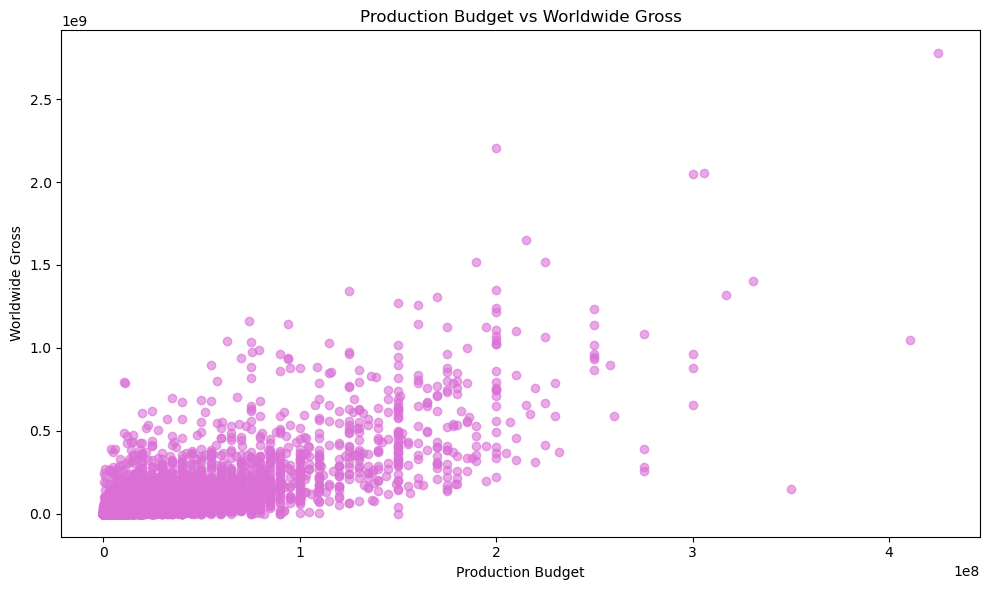

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(budget['production_budget'], budget['worldwide_gross'], alpha=0.6, color='orchid')

plt.title('Production Budget vs Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.savefig('production vs gross.png', dpi=300, bbox_inches='tight')
plt.show()


The relationship between Worldwide gross and production Budget is positive correlation because there is a visible upward trend as there is an increase in production there is also a increase in the worldwide gross.Low production budget are clustered together with moderate  grossings while higher production budget are more spread some returning more than others(outliers).

This doesn't mean the more you spend more on movie production the more the grossing even though they are some exceptions **(ouliers)** but this means there is a potential in higher production budget. **The relationship is not linear** because they are other factors that might affect the movie grossing or how well a movie does e.g Release date , cast etc. not just the production budget.

## 6.2.3 <U>PROBABILITY DISTRIBUTION</u>

We want to find out the returns the studio make after factoring out the budget spent on the movie.Inorder to know how really profitable the movie industry is or do they make losses and by how much.

In [101]:
budget['gross_profit'] = budget['worldwide_gross'] - budget['production_budget']


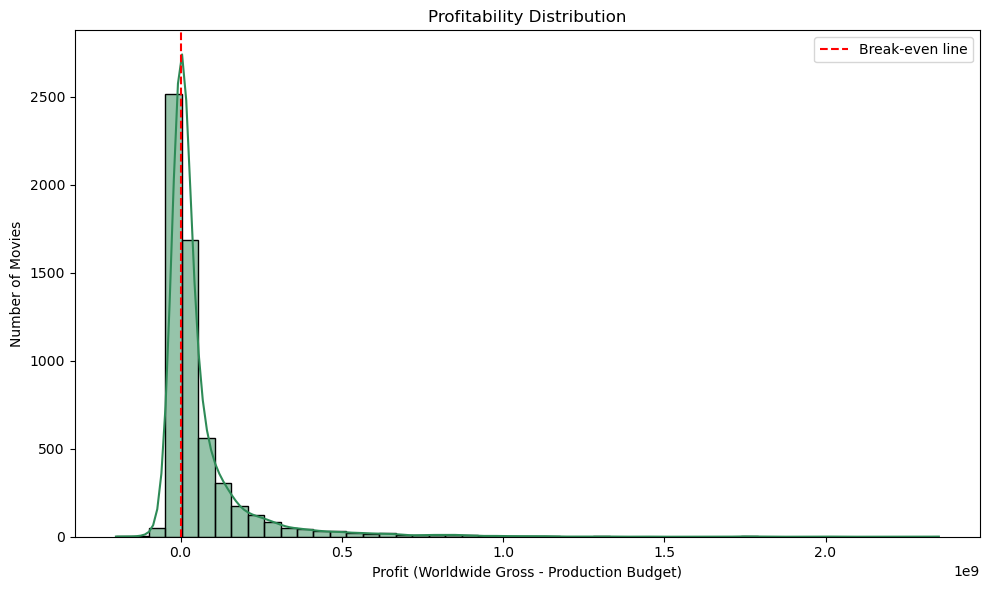

In [102]:
#plot
plt.figure(figsize=(10,6))
sns.histplot(budget['gross_profit'], bins=50, kde=True, color='seagreen')
plt.title('Profitability Distribution')
plt.xlabel('Profit (Worldwide Gross - Production Budget)')
plt.ylabel('Number of Movies')
plt.axvline(x=0, color='red', linestyle='--', label='Break-even line')
plt.legend()
plt.tight_layout()
plt.show()


The visualization is a right-skewed graph.This means that most of the movies make small profits or losses,this is because the data is clustered around the 0.0 profit mark.The long tail to the right shows that a small number of movies make huge profits,likely representing blockbuster hits which are the exceptions(outliers).

Majority of the movies make negative profits and this is due to the high-risk nature of the movie industry because most movies are either a hit or a miss.

Instead of shying away from investment let's do more analysis on the genres that have high rating to know the most popular and the one's majority of people can term as **HITS**.

## 6.2.4 <U>TOP GENRES BY AVERAGE RATING</u>

In [103]:
genre_rating = merged_imdb.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
print(genre_rating.head(20))
print(genre_rating.tail())

genres
Short         8.80
Documentary   7.33
Game-Show     7.30
News          7.27
Biography     7.16
Music         7.09
History       7.04
Sport         6.96
War           6.58
Reality-TV    6.50
Musical       6.50
UNK           6.50
Drama         6.40
Family        6.39
Animation     6.25
Adventure     6.20
Romance       6.15
Crime         6.12
Comedy        6.00
Mystery       5.92
Name: averagerating, dtype: float64
genres
Action     5.81
Thriller   5.64
Sci-Fi     5.49
Horror     5.00
Adult      3.77
Name: averagerating, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_14936\1444096871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.head(10).values, y=genre_rating.head(10).index, palette='viridis')


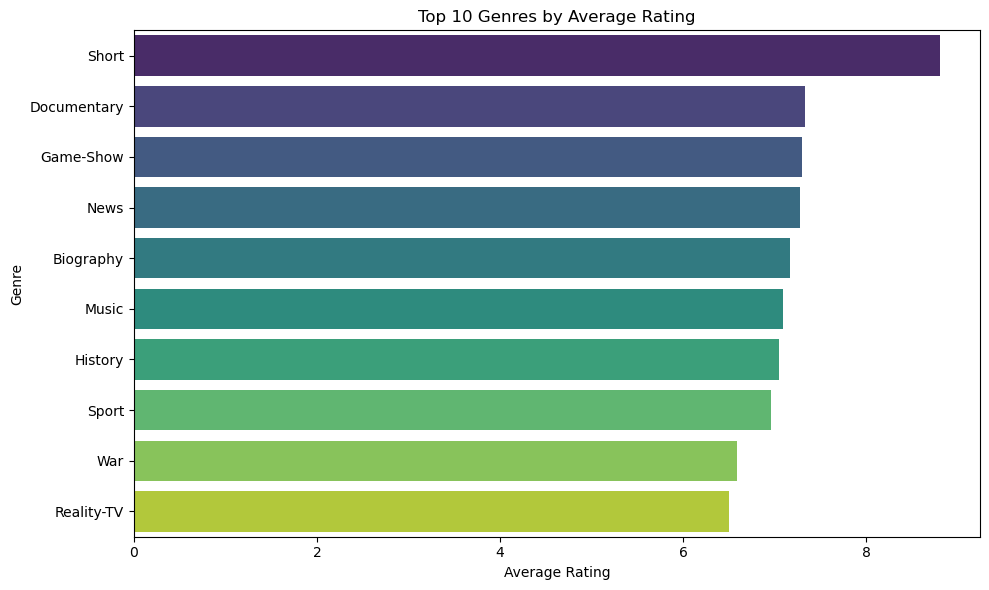

In [104]:
# Plot top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.head(10).values, y=genre_rating.head(10).index, palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


Average rating is not enough to decide the genre to invest in because we didn't factor in the number of votes those genres recieved.Let's do further analysis to determine the genre with the most votes but are also highly rated.

## 6.2.5 <U>TOP GENRES BY NUMBER OF VOTES</u>

In [105]:
votes_per_genre = merged_imdb.groupby('genres')['numvotes'].sum().sort_values(ascending=False)

In [106]:
# Total votes across all genres
total_votes = votes_per_genre.sum()
# Calculate percentage per genre
votes_percentage = (votes_per_genre / total_votes * 100).round(2)

In [107]:
print(votes_percentage.head(10))
print(votes_percentage.tail())

genres
Drama       17.43
Action      14.75
Adventure   12.28
Comedy      10.83
Thriller     7.02
Sci-Fi       6.26
Crime        5.78
Romance      3.92
Fantasy      3.84
Mystery      3.60
Name: numvotes, dtype: float64
genres
UNK          0.00
Game-Show    0.00
Reality-TV   0.00
Adult        0.00
Short        0.00
Name: numvotes, dtype: float64


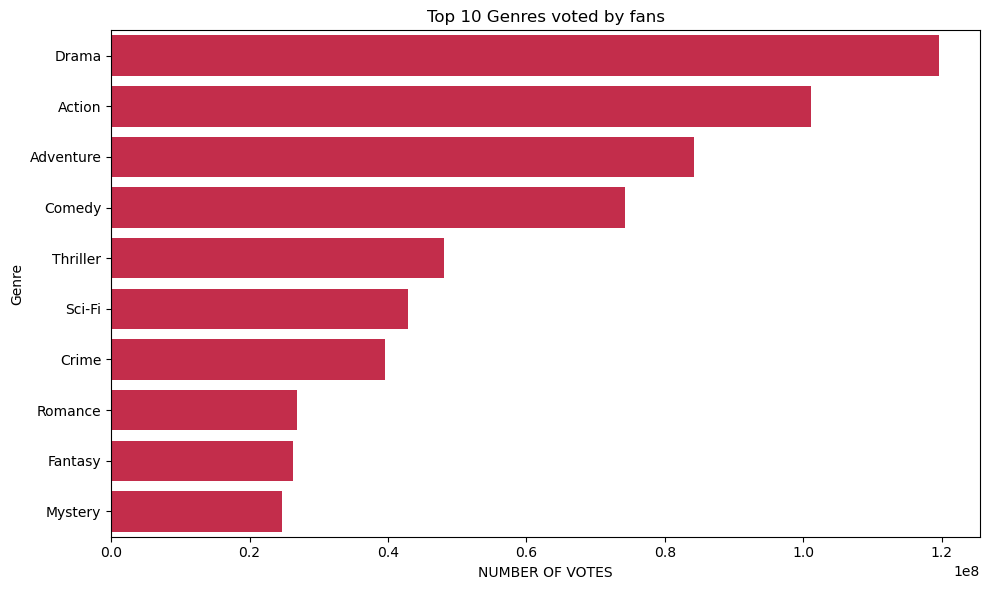

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(x=votes_per_genre.head(10).values, y=votes_per_genre.head(10).index, color='crimson')
plt.title('Top 10 Genres voted by fans')
plt.xlabel('NUMBER OF VOTES')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Genres like Short have percentage of 0.01% of the the votes but the highest average rating of **8.8** this is why Average rating alone is not the surest way of measuring for popularity and fan favorites.Similar to news and Reality Tv with a **0.14%** and **0.4%** percentage of votes but an average rating of **7.27** and **6.5** respectively.And also number of votes is not enough to judge for popularity for example the genre Action recieved **14.74%** of the votes but a **5.81** rating which is low than other genres.

## 6.2.6 <U>TOP POPULAR GENRES BY AVERAGE RATING</u>

let's get a list of this genre with the most number of votes and continue by getting their average rating.

In [109]:
# top genres by number of votes
top_genres = votes_per_genre.head(10).index.tolist()
# Filter original data for only those top genres
filtered_df = merged_imdb[merged_imdb['genres'].isin(top_genres)]
# Group by genre and calculate average rating
top_genre_ratings = filtered_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

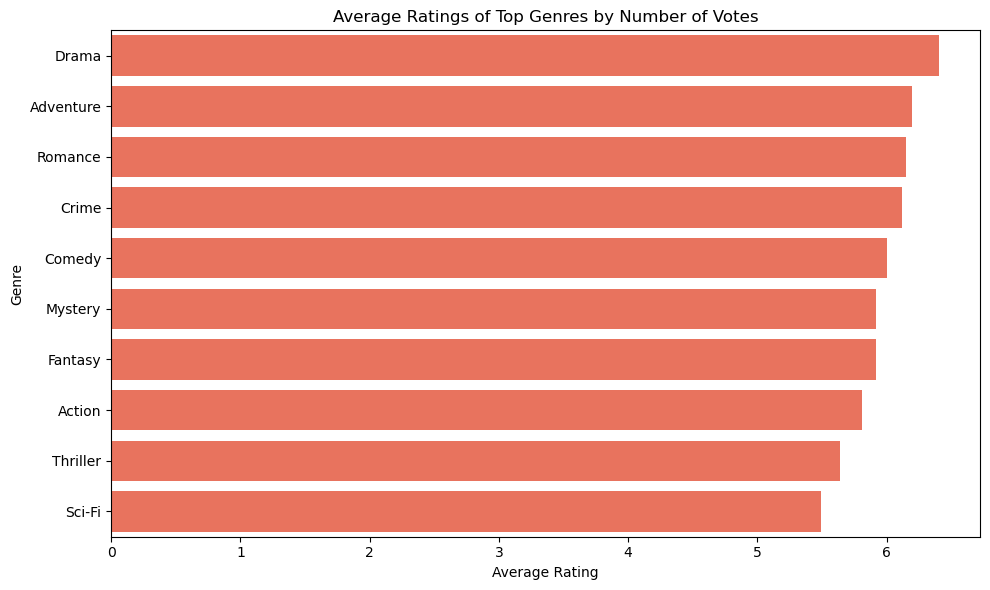

In [110]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_genre_ratings.values, y=top_genre_ratings.index, color='tomato')
plt.title('Average Ratings of Top Genres by Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('top popular genres.png', dpi=300, bbox_inches='tight')
plt.show()

## Top 5 popular genre
From that analysis we can advice investors to invest in the following genres:
* **Drama** which has the a percentage of votes **17.43%** of the votes and an overral average rating of **6.4**.
* **Adventure** which has the 2nd highest percentage of votes **14.75%** of the votes and overrall rating of **6.2** which is above average
* **Romance** has a  3rd highest percentage of the votes **3.92** and an average rating of **6.15**
* **Crime** has a **5.78** of votes and an average rating of **6.12**
* **Mystery** with a percentage of **3.60%** of votes and an average rating of **5.92**

# NOTE:  **This gives us a balance between genres that are mostly watched and also have a good rating because both factors are important in deciding what genre to invest it in the long run.**

# 6.3 MULTIVARIATE ANALYSIS

## 6.3.1 <u>COMPARE FRESH AND ROTTEN RATING BY GENRE</U>

Let's analyse the genre with great ratings using the dataset `mergedinfo_reviews.csv`.

In [111]:
df.columns

Index(['movie_id', 'primary_title', 'genres', 'averagerating', 'numvotes'], dtype='object')

In [112]:
df =pd.read_csv('mergedinfo_reviews.csv')

In [113]:
df['genre'] = df['genre'].str.split(',')
df= df.explode('genre')
df['genre'] = df['genre'].str.strip()

In [114]:
genre_fresh_counts = df.groupby(['genre', 'fresh']).size().reset_index(name='count')
genre_fresh_counts = genre_fresh_counts.sort_values(by='count', ascending=False)
genre_fresh_counts.head()

,genre,fresh,count
16,Drama,fresh,21945
10,Comedy,fresh,12880
17,Drama,rotten,11659
11,Comedy,rotten,8922
0,Action and Adventure,fresh,7334


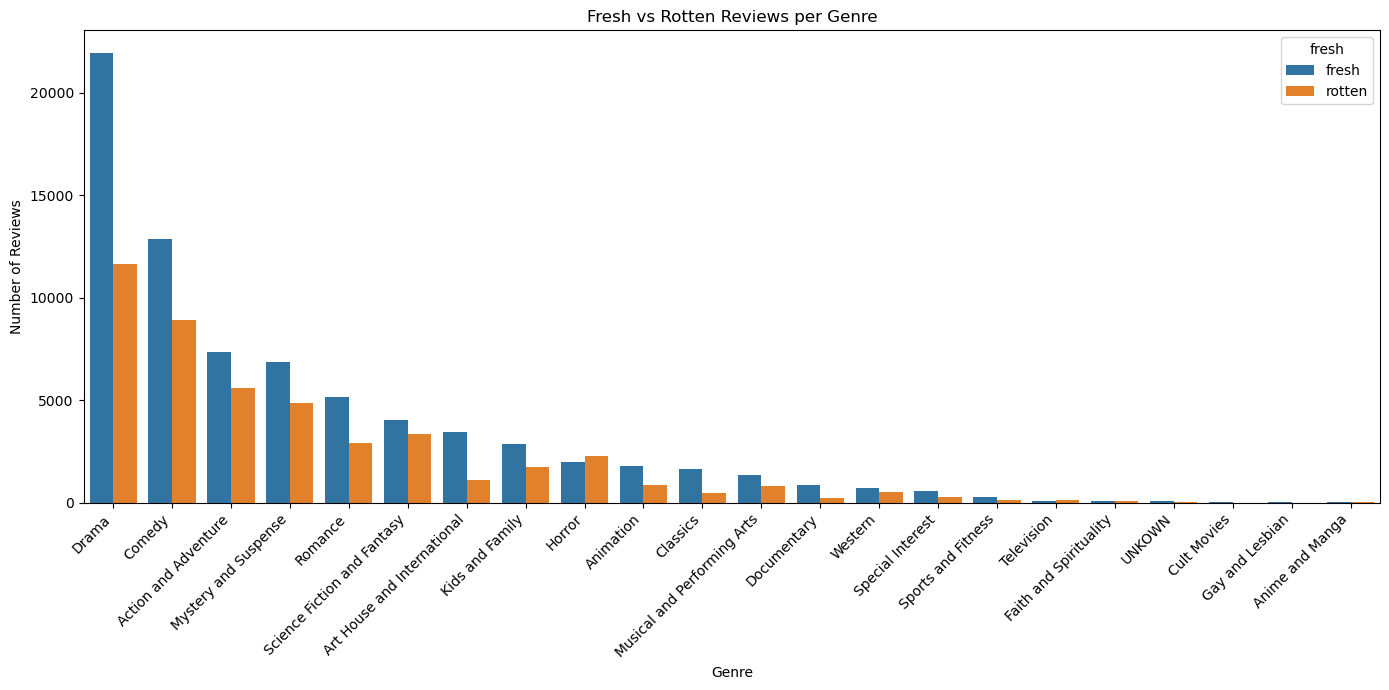

In [115]:
plt.figure(figsize=(14, 7))
sns.barplot(data=genre_fresh_counts, x='genre', y='count', hue='fresh')

plt.title('Fresh vs Rotten Reviews per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# High_review genres:
**Drama** has the highest number of reviews overall.It has  more fresh than rotten reviews we can say it was generally well-received.
Comedy and Action and Adventure have a high total review counts after **Drama** and they both have slightly more fresh than rotten, but with a smaller gap compared to Drama.
Genres like Romance, Sci-Fi and Fantasy, and Horror also get decent review volumes.
# Low-review genres:
Genres on the far right (e.g., **Gay and Lesbian, Cult Movies, Anime and Manga**) have very few reviews.
This could indicate niche audiences or fewer total films reviewed in these genres.

## 6.3.2  <u>DOMESTIC GROSS AND FORIEGN GROSS OVER THE YEARS</U>

In [116]:
budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'studio', 'foreign_gross_estimate', 'gross_profit'],
      dtype='object')

let's get to analyse the trend that domestic gross and foriegn gross has had over the years so that we can know  the markets over the years.

In [117]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross_estimate,gross_profit
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,UNK,2015837654.00,2351345279.00
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,BV,804600000.00,635063875.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,UNK,107000000.00,-200237650.00
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,BV,944008095.00,1072413963.00
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,UNK,696540365.00,999721747.00


In [118]:
budget['release_date'] = pd.to_datetime(budget['release_date'], errors='coerce')

In [119]:
budget['year'] = budget['release_date'].dt.year

In [120]:
yearly_gross = budget.groupby('year')[['domestic_gross_x', 'foreign_gross_estimate']].sum()
yearly_gross = yearly_gross.loc[(yearly_gross.index >= 1980) & (yearly_gross.index <= 2023)]

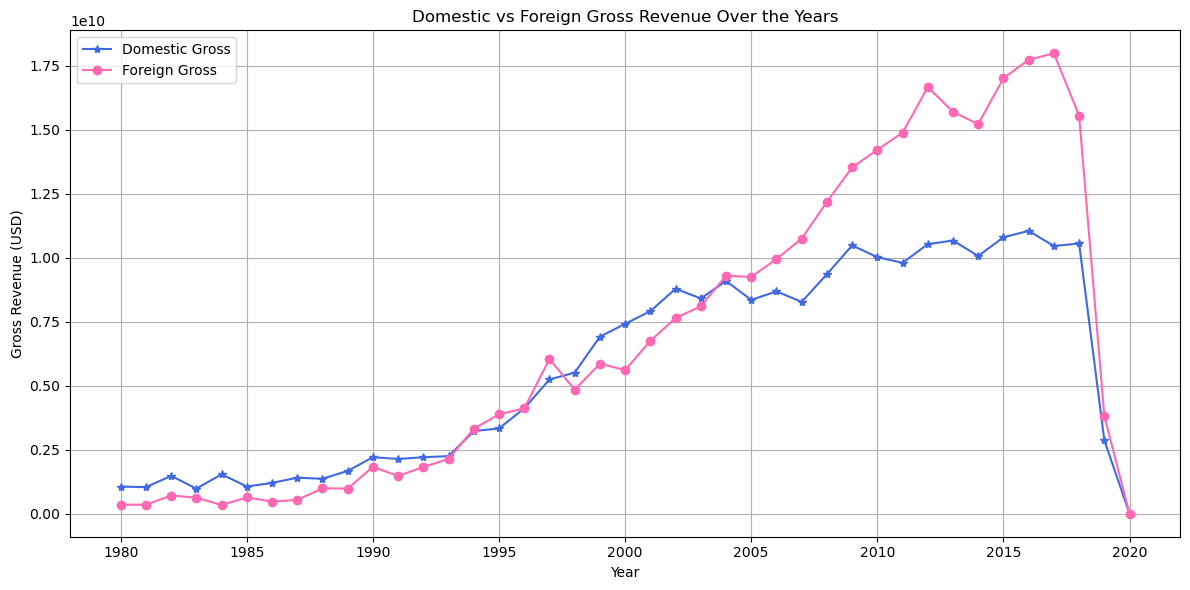

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_gross.index, yearly_gross['domestic_gross_x'], label='Domestic Gross', color='royalblue', marker='*')
plt.plot(yearly_gross.index, yearly_gross['foreign_gross_estimate'], label='Foreign Gross', color='hotpink', marker='o')

# Styling
plt.title('Domestic vs Foreign Gross Revenue Over the Years')
plt.xlabel('Year')
plt.ylabel('Gross Revenue (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Domestic vs Foreign gross.png', dpi=300, bbox_inches='tight')
plt.show()

# Overall Growth (1980–2015):

Both Domestic (blue line) and Foreign (pink line) gross revenues increased steadily over time.

Around the mid-2000s, foreign gross starts to consistently exceed domestic gross. This suggests that international markets became increasingly important for box office success.

# Foreign Gross Peaks:

Foreign revenue hit its highest point around 2015–2018.

The foreign market clearly dominated in revenue compared to domestic in this period.This can be attributed to the fact that movies translated well across all cultures,they started dubbing them in native languages that would be understood by other Regions and this led to more theaters being built and increased movie attendance globally.

# Dip After 2019:

There is a sharp drop in both domestic and foreign revenues in 2020, likely due to the **COVID-19 pandemic** that severely affected global film production and theater attendance.This was a tough time for the movie industry but this also led to the rise of streaming platforms for example Netflix,Hulu and now people could access films without leaving there homes.

# Final verdict(Foreign vs. Domestic):

Throughout the later years (2000s onward), the foreign gross outpaced the domestic gross, indicating studios were earning more from international audiences.

# Currently 
**Studio release films both in theaters and on streaming platforms this has unlocked new revenue models.This explansion caters for people who don't go to watch films in studios' and is a much cheaper option in comparison.**

# 7 CONCLUSION

* The most popular genre is Drama constituting 26.1% of all the movies.
* **R** (Restricted) consitute 42.0% of all the movies and **PG-13** (parents strongly cautioned) is 31.6%.
*  A small number of movies make huge profits,likely representing blockbuster hits which are the exceptions while majority of the movies make negative profits and this is due to the high-risk nature of the movie industry because most movies are either a hit or a miss.
*  Throughout the later years (2000s onward), the foreign gross outpaced the domestic gross, indicating studios were earning more from international audience.
*  The relationship between Worldwide gross and production Budget is positive correlation because there is a visible upward trend as there is an increase in production there is also a increase in the worldwide gross
*  The foreign market clearly dominated in revenue compared to domestic from the year 2015 to 2018.
*  The Studio with the highest budget is BUENA VISTA(BV) ,a distribution label for Walt Disney Studios Motion Pictures,which has allocates a budget of 9,450,800,000 to it's movie production.
*  Drama has the highest number of reviews overall.It has more fresh than rotten reviews we can say it was generally well-received.
*  There was a sharp drop in both domestic and foreign revenues in 2020, likely due to the **COVID-19 pandemic** that severely affected global film production and theater attendance.
*  Genres e.g., Gay and Lesbian, Cult Movies, Anime and Manga have very few reviews. This could indicate niche audiences or fewer total films reviewed in these genres.

# 8 RECOMMENDATIONS

* The stakeholders can invest in genres like Drama, Adventure, Romance, Crime and Mystery because they have a balance between popularity and also have a generally good overall rating.
* The stakeholders should invest in movies that are rated PG-13 films because they will give us a broad audience,while investing in R-rated films gives us a creative flexiblity because of the targeted age group and a niche appeal to the consumers.
* The stakeholders can avoid spending  more on movie production and factor in other aspects e.g Release date , Cast ,genre inorder to have a profitable return on investment because it's not a guarntee that the more you spend on movie the movies the more profit you make but it does increase the potential other factors being constant.
* The stakeholders can invest in unlocking new revenue models such as adding movies to streaming platforms because of the risky nature of the industry and the state of the world e.g a Pandemic like the COVID-19.
* The stakeholders should focus catering to the international market because of the upward trend in the increase of foriegn gross over the years especially  in the 2000's
* The stakeholders should pay attention to the stiff competition like BUENA VISTA(BV) which is  distribution label for Walt Disney Studios Motion Pictures allocates a budget of 9,450,800,000 to it's movie production and look for investors who are intrested to invest in the company.

## Investing in the movie industry remains high risk, but it's also high reward if studios are agile, data-driven, and global-minded. During the COVID 19 pandemic the industry showed that it can evolved quickly, and the demand for entertainment hasn’t diminished only the delivery has changed.
#                        **High risk fuels high reward—just like every great blockbuster.**